In [181]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import quaternion

np.set_printoptions(precision=4, linewidth=200, sign=" ")
plt.rcParams["figure.figsize"] = [15,10]

In [182]:
path = r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\pose_graph\examples\output\H.json"

with open(path, "r") as inp:
    data = json.load(inp)
    data = np.array(data[0], dtype=float).reshape((data[1], data[2]))

data.shape

(594, 594)

So it seems that $M_i$, $A$ and $B$ are producing `NaN` values when the constraint contains `node[0]`. Why that is I don't currently know. It seems strange to say the least. Definitely need to look into what could be causing this to happen - its probably something to do with the fact that it starts at the identity but I cant really be sure without some further inspection.

0.007460194392355718

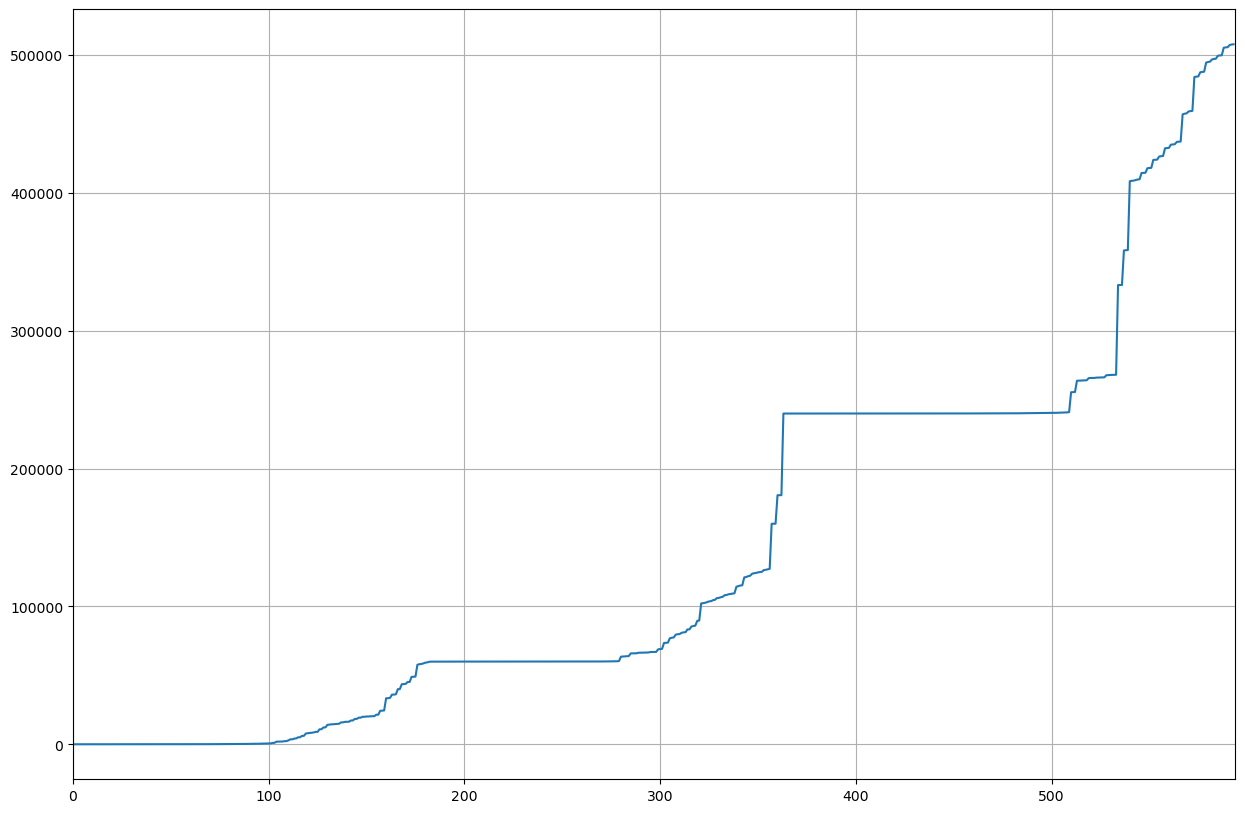

In [183]:
plt.plot(sorted(np.linalg.eigvals(data)))
# plt.scatter(np.array([i for i, x in enumerate(np.linalg.eigvals(data)) if x < 0]), np.linalg.eigvals(data)[np.linalg.eigvals(data) < 0], c="r", s=20)
# plt.scatter(np.array([i for i, x in enumerate(np.linalg.eigvals(data)) if x == 0]), np.linalg.eigvals(data)[np.linalg.eigvals(data) == 0], c="g", s=5)
# plt.ylim((-5E-9,5E-9))
plt.xlim((0, data.shape[0]))
plt.grid(True, "both")
np.min(np.linalg.eigvals(data))

(0.0, 0)

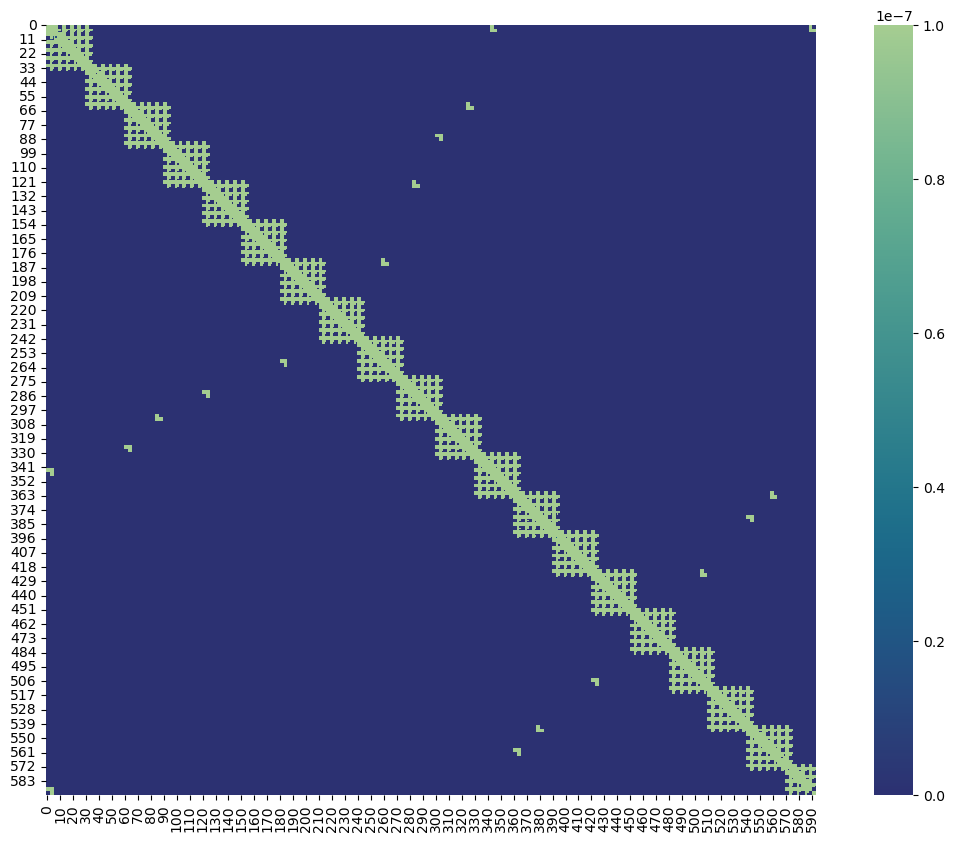

In [184]:
sns.heatmap(np.abs(data), square=True, vmax=0.0000001, cmap="crest_r")
np.sum(np.sum(np.abs(data), axis=0) == 0)/data.shape[0]*100, np.sum(np.sum(np.abs(data), axis=0) == 0)

<Axes: >

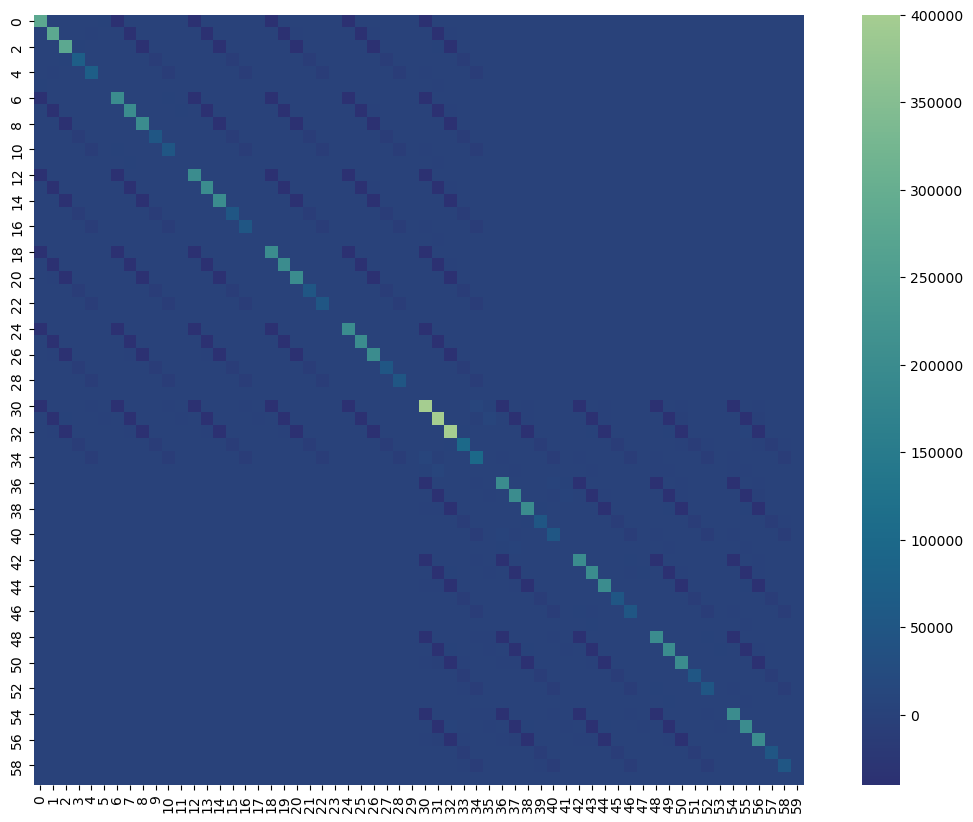

In [185]:
lb, ub = 0, 60
sns.heatmap(data[lb:ub, lb:ub], square=True, cmap="crest_r")

## A, B, error, omega analysis

In [186]:
path = Path(r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\pose_graph\examples\output\data.json")
with open(path, "r") as inp:
    jacobian_data = json.load(inp)


As, Bs, errors, omegas, Zij, Xi, Xj, xi_project, xj_project, idx = zip(*jacobian_data)

length = len(As)

As = np.array(As, dtype=float).reshape((length,6,7))
Bs = np.array(Bs, dtype=float).reshape((length,6,7))
errors = np.array(errors, dtype=float).reshape((length,6))
omegas = np.array(omegas, dtype=float).reshape((length,6,6))
xi_project = np.array(xi_project, dtype=float).reshape((length,7,6))
xj_project = np.array(xj_project, dtype=float).reshape((length,7,6))
idx = np.array(idx).reshape((length, 2))


def unpack_data(data):
    return tuple([np.array(x) for x in zip(*[(x["quat"], x["translation"]) for x in data])])

Zij = unpack_data(Zij)
Xi = unpack_data(Xi)
Xj = unpack_data(Xj)

idx.shape

(300, 2)

(300, 6)

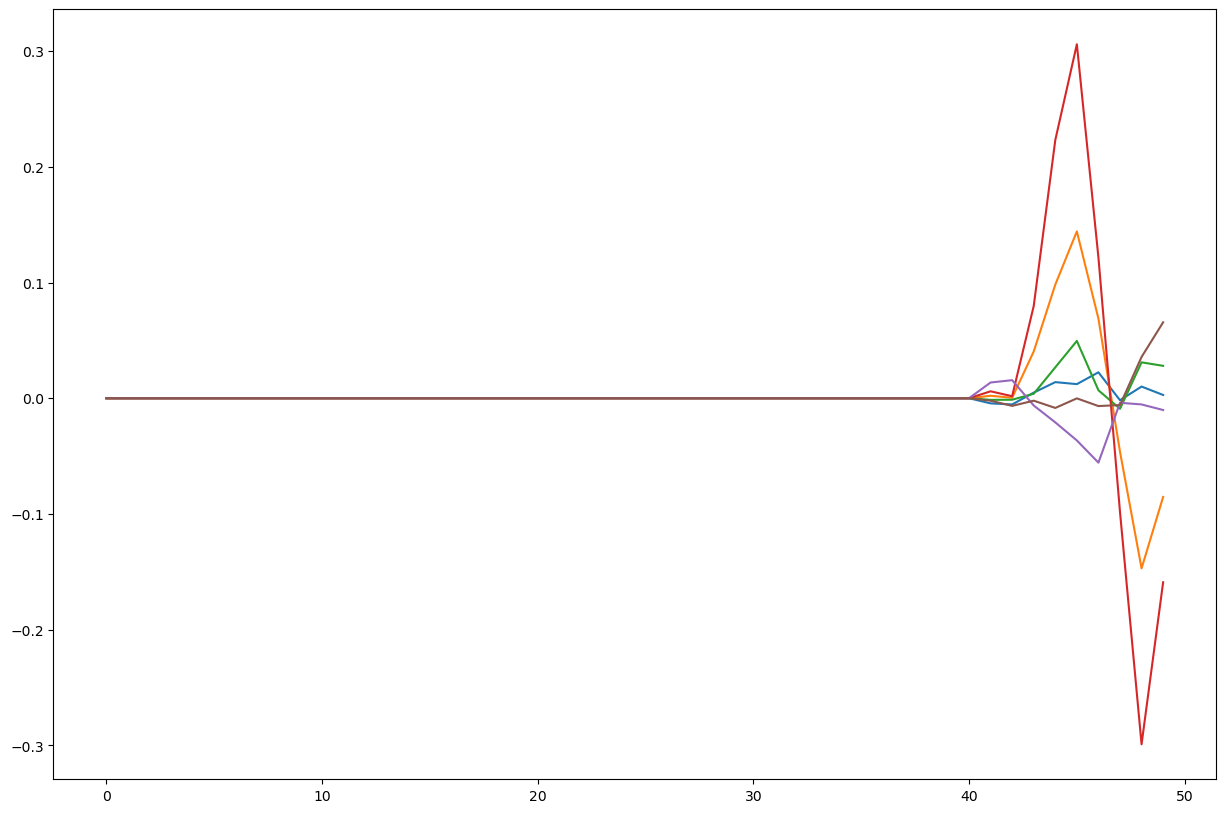

In [187]:
plt.plot(errors.squeeze()[250:])
errors.shape

In [188]:
path = r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\pose_graph\examples\output\b.json"

with open(path, "r") as inp:
    b_data = json.load(inp)
    print(b_data)
    print(b_data[1], b_data[2])
    b_data = np.array(data[0], dtype=float)

b_data.shape

[[394.6219, -104.57733, 98.08306, -289.55942, 84.60617, 14.125095, -1.1322011e-05, 4.4553883e-05, -9.652763e-05, -3.9808598e-05, -0.000424217, 5.493646e-07, -1.7615486e-05, -9.901981e-06, -1.8516808e-05, -0.00022760476, 8.0580256e-05, -8.157419e-08, 2.20921e-06, -5.367322e-07, -2.3163338e-06, -0.00014483967, -5.6278135e-05, -5.0054936e-08, 2.2710976e-06, -2.7119438e-07, 2.3284703e-05, -3.9604667e-05, -6.979301e-05, -1.1719852e-08, 1.856036e-05, 0.00024489584, -0.00013120465, -0.00031666987, 0.00036388444, 1.889385e-05, 0.0005990247, 0.0011776967, -0.00020836813, -0.0006577286, -1.5365773e-05, 4.66807e-05, 0.00079068344, 0.0020796857, -0.00012792251, -0.00074822584, 4.3206954e-05, 6.58462e-05, -0.0002610944, -0.00037543566, 7.473717e-05, 0.0008027789, -5.7741778e-05, -5.7365634e-07, -0.00040960417, -0.0012676463, 4.025587e-05, 0.0007056757, -9.42724e-07, -2.18765e-06, -177.14314, -1622.2269, 84.51177, 54.09096, 40.938503, 64.52985, -8.939061e-05, 0.0005168907, -0.000825839, -7.2380244e-

(594,)

0.9545454545454546

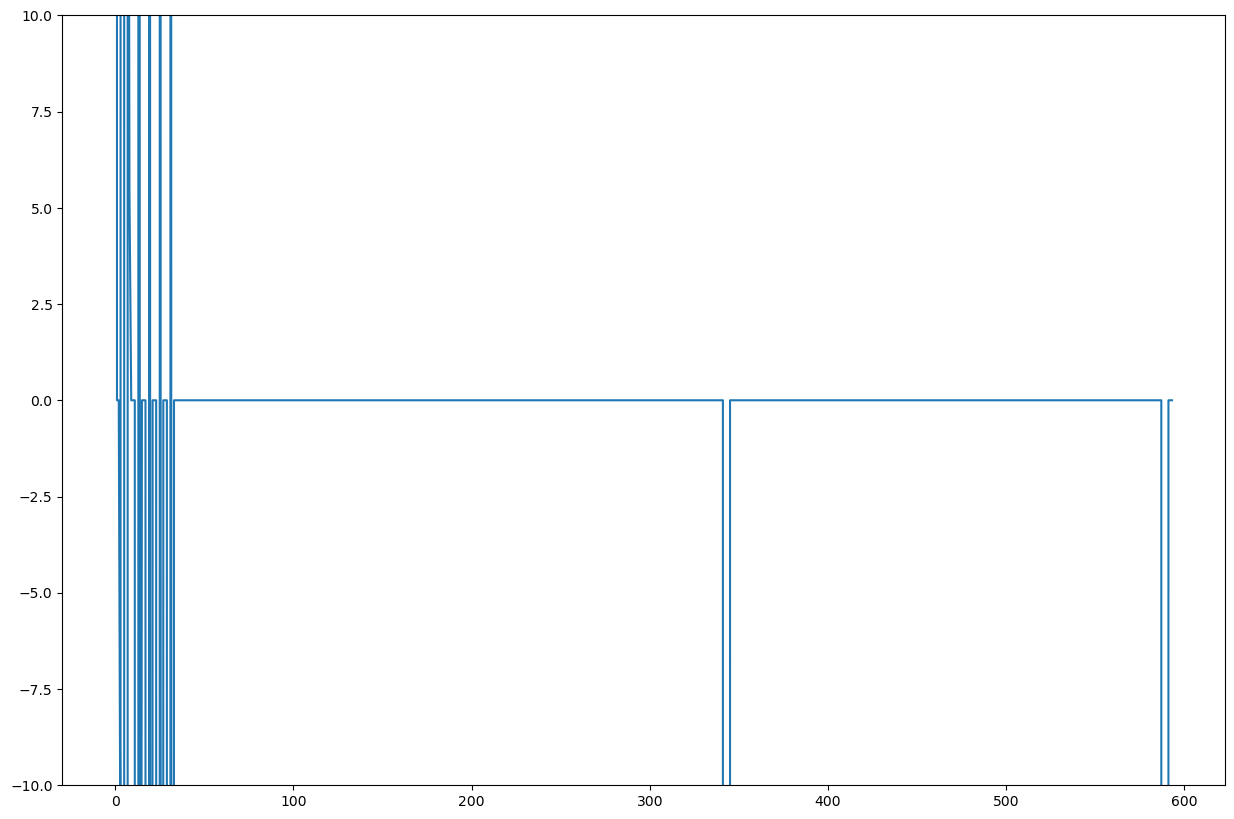

In [189]:
plt.plot(b_data)
plt.ylim((-10,10))
np.sum(b_data == 0) / b_data.shape[0]

In [190]:
np.nonzero(b_data)[0]//6

array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5, 57, 57, 57, 98, 98, 98], dtype=int64)

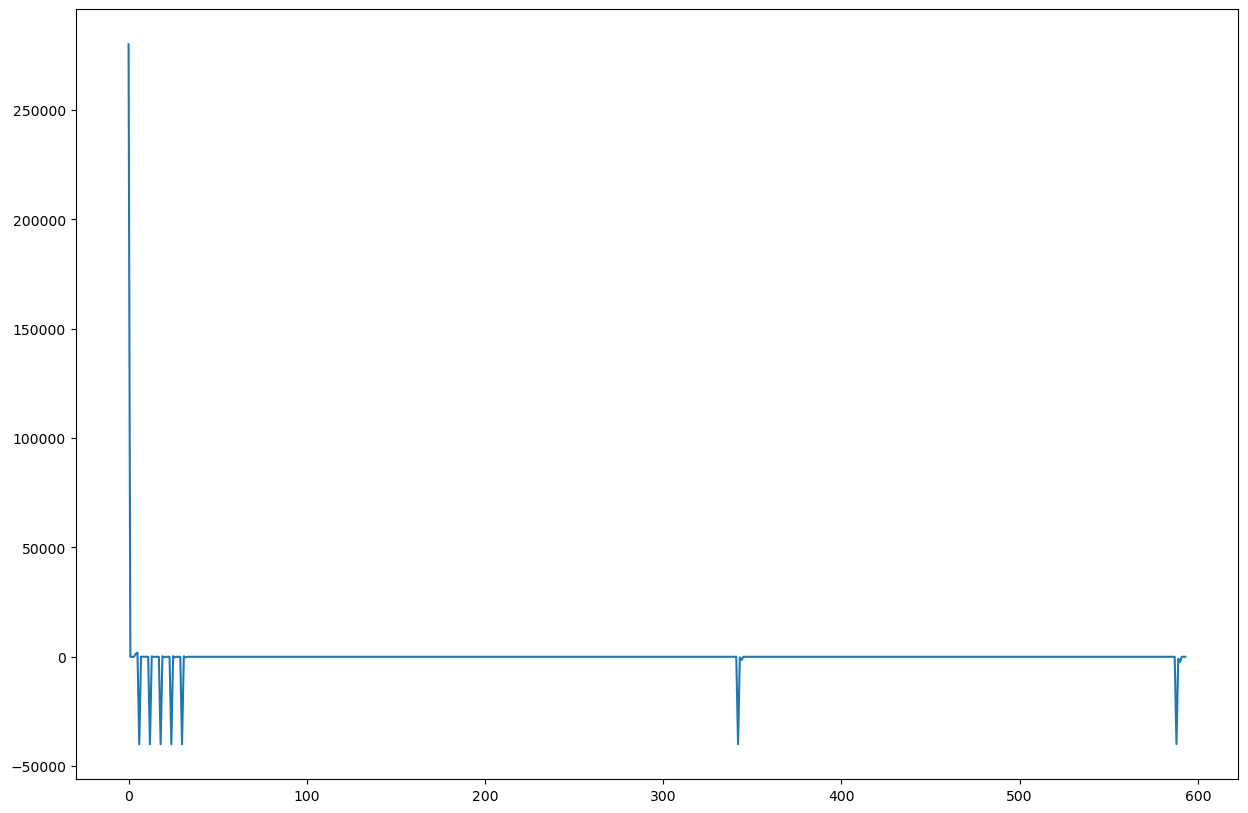

In [191]:
path = r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\pose_graph\examples\output\delta_x.json"

with open(path, "r") as inp:
    delta_x = json.load(inp)
    delta_x = np.array(data[0], dtype=float)

plt.plot(delta_x)

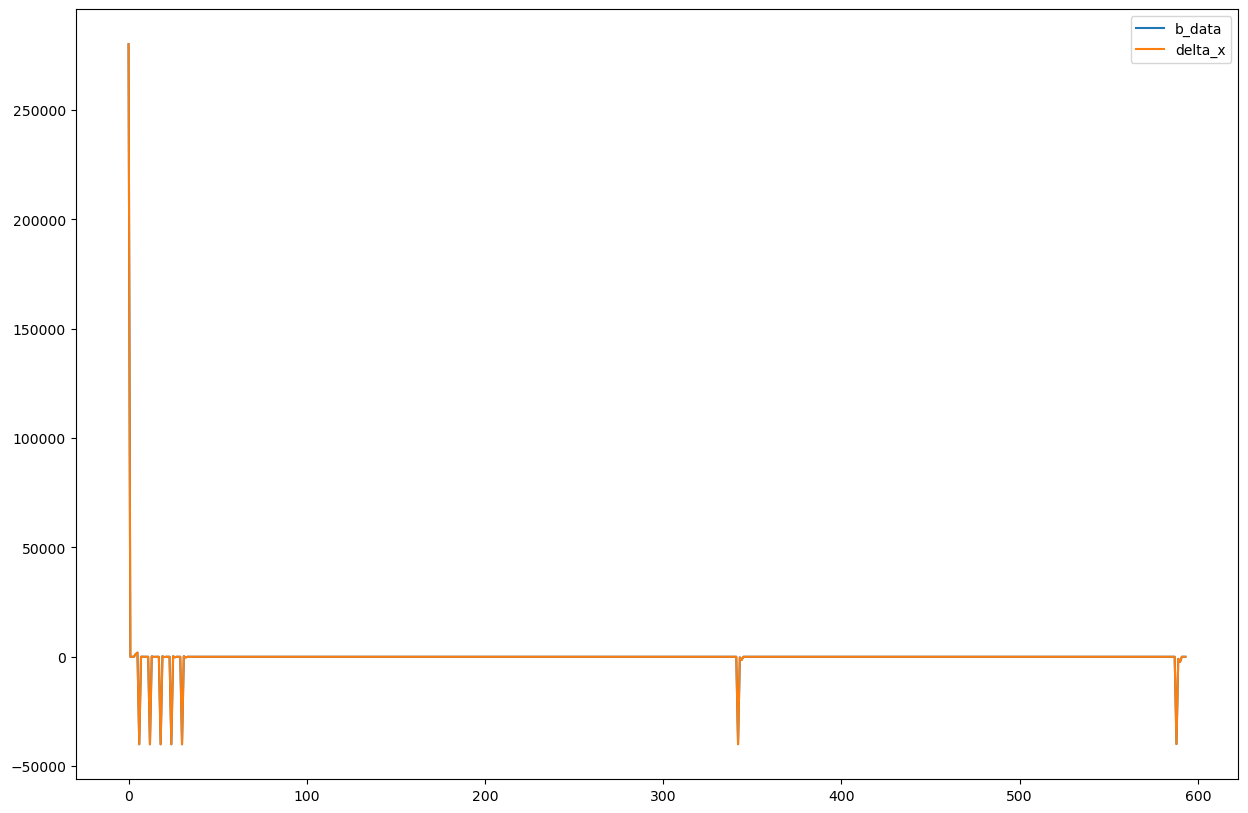

In [192]:
plt.plot(b_data, label="b_data")
plt.plot(delta_x, label="delta_x")
plt.legend()

<Axes: >

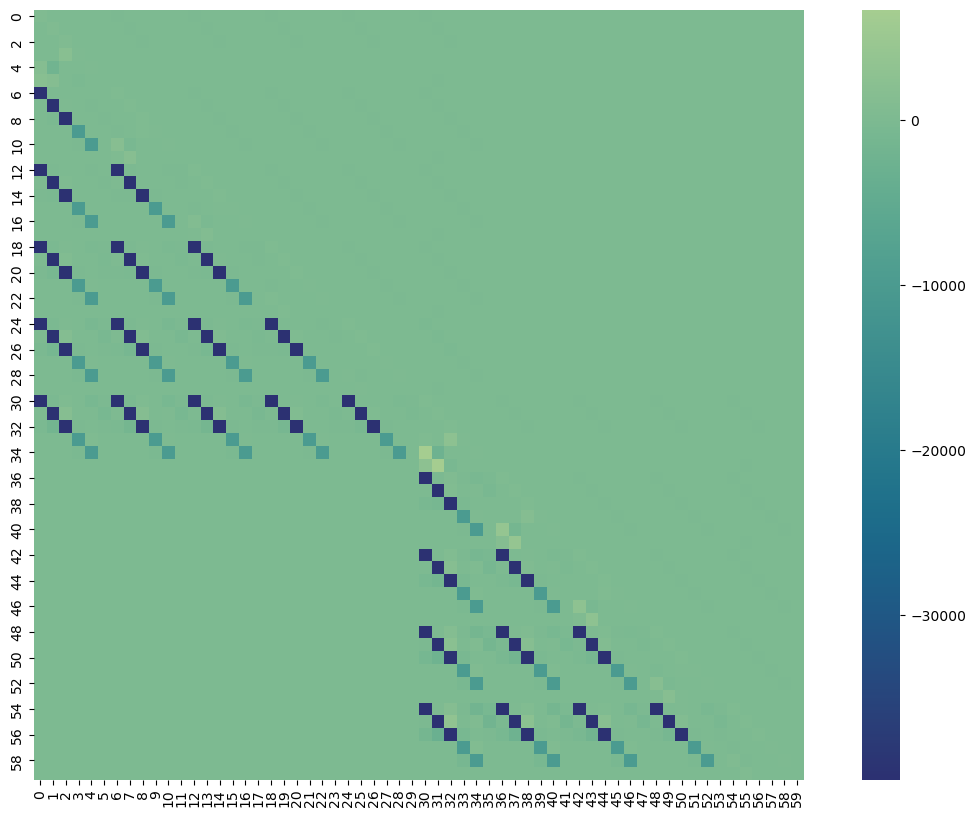

In [193]:
from scipy.linalg import cho_factor, cho_solve

c, low = cho_factor(data)

sns.heatmap(c[lb:ub,lb:ub], square=True, cmap="crest_r")

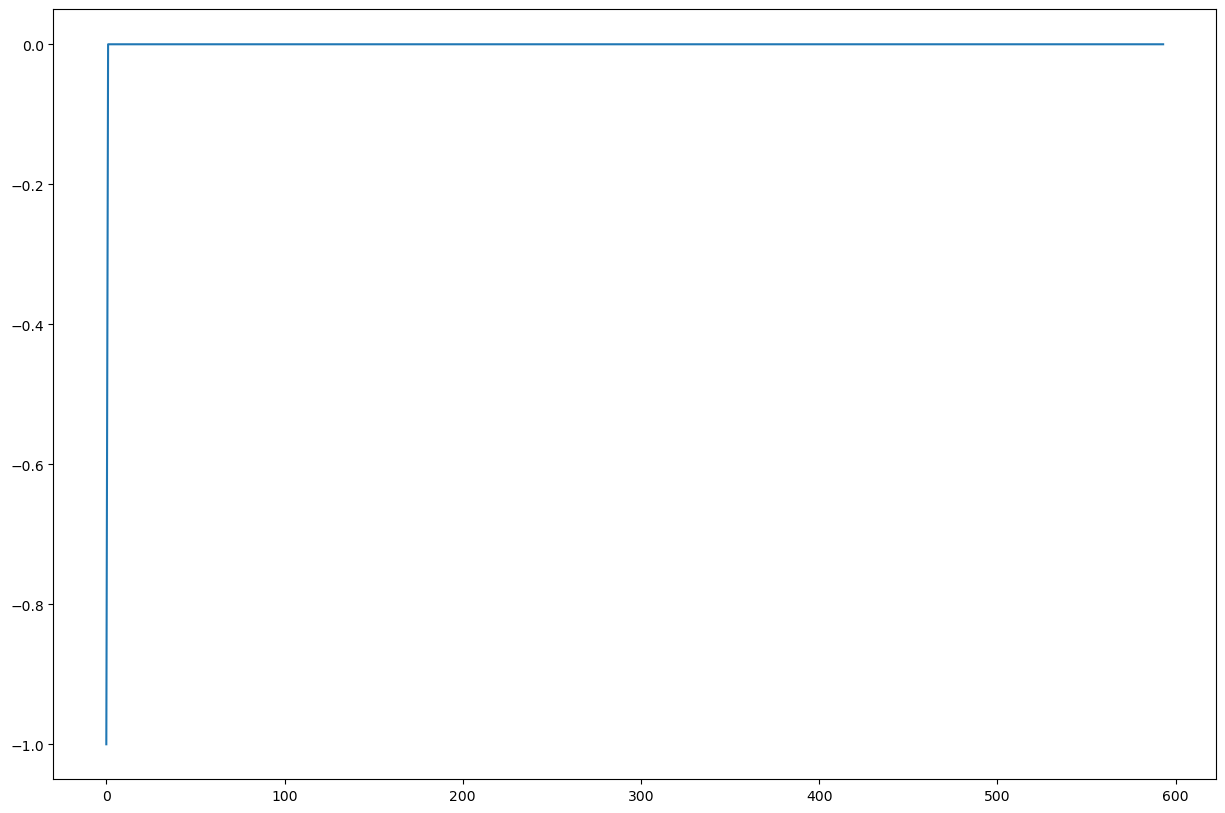

In [194]:
x = cho_solve(cho_factor(data), -b_data)

plt.plot(x)

<Axes: >

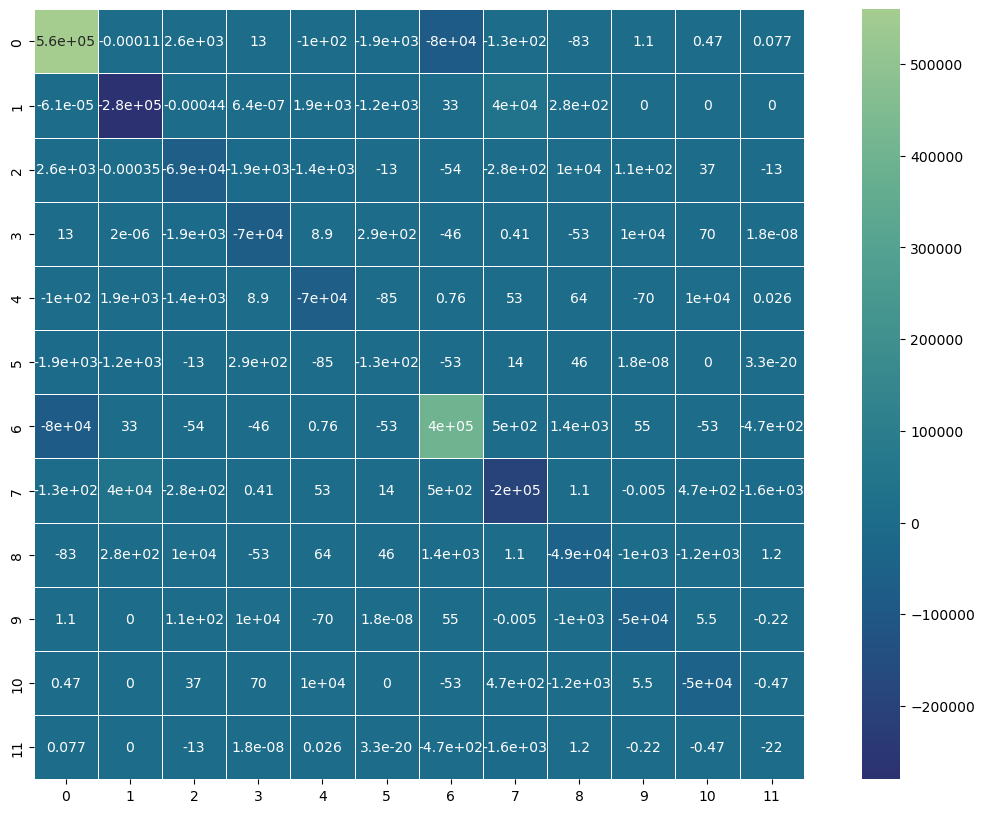

In [195]:
lb, ub = 0, 12

H = np.zeros_like(data)
b = np.zeros_like(b_data)

for k in range(length):
    i, j = idx[k]
    A = As[k]@xi_project[k]
    B = Bs[k]@xj_project[k]
    omega = omegas[k]

    H[6*i:6*i+6, 6*i:6*i+6] += A.T@omega@A
    H[6*i:6*i+6, 6*j:6*j+6] += A.T@omega@B
    H[6*j:6*j+6, 6*i:6*i+6] += B.T@omega@A
    H[6*j:6*j+6, 6*j:6*j+6] += B.T@omega@B

    b[6*i:6*i+6] = A.T@omega@errors[k]
    b[6*j:6*j+6] = B.T@omega@errors[k]

sns.heatmap((H - data)[lb:ub,lb:ub], square=True, cmap="crest_r", linewidth=0.5, annot=True)

-9.580868911978131e-11

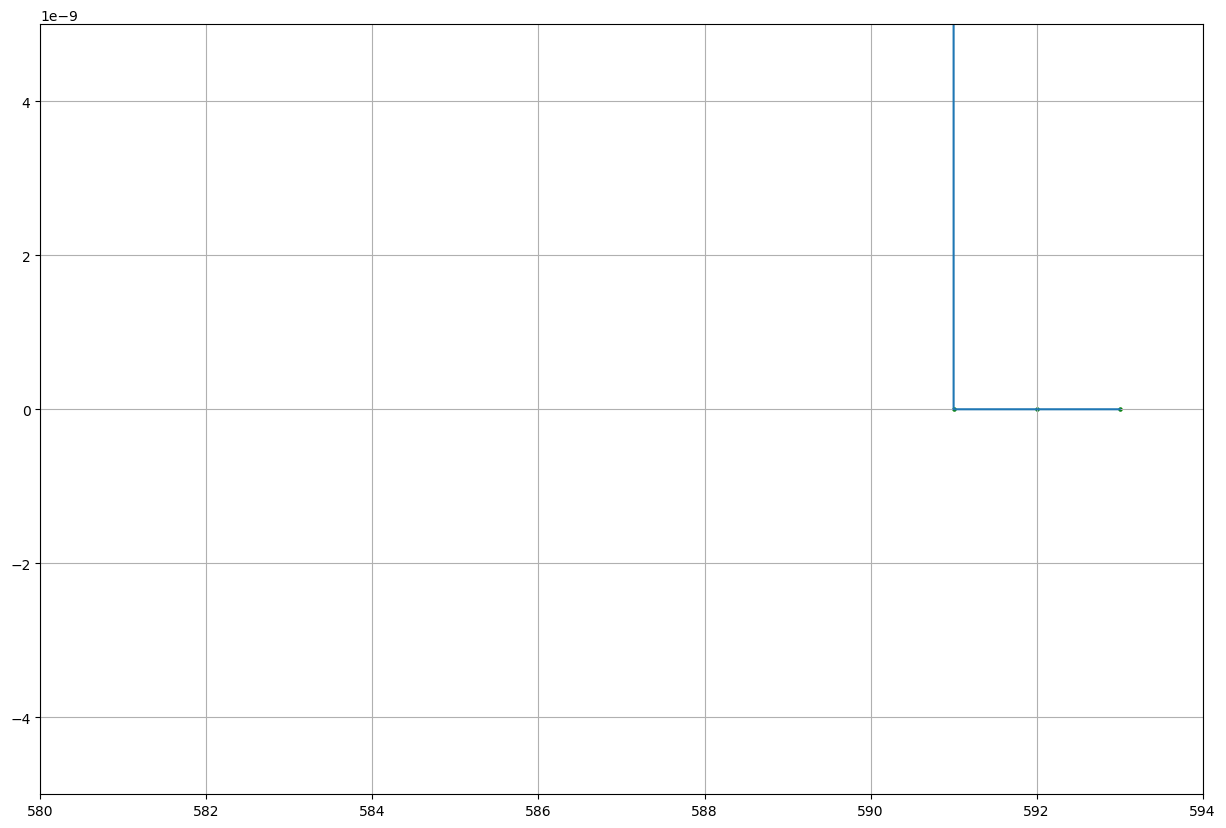

In [196]:
plt.plot(np.linalg.eigvals(H))
plt.scatter(np.array([i for i, x in enumerate(np.linalg.eigvals(H)) if x < 0]), np.linalg.eigvals(H)[np.linalg.eigvals(H) < 0], c="r", s=20)
plt.scatter(np.array([i for i, x in enumerate(np.linalg.eigvals(H)) if x == 0]), np.linalg.eigvals(H)[np.linalg.eigvals(H) == 0], c="g", s=5)
plt.ylim((-5E-9,5E-9))
plt.xlim((580, H.shape[0]))
plt.grid(True, "both")
np.min(np.linalg.eigvals(H))